In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 資料集介紹
這是一個紀錄使用者瀏覽網站以及最後是否會購買的資料集，總共有 18 個 column ，其中 10 個是 numerical attributes, 8 個是 categorical attributes ，以下做個大致的分類與介紹：
```
類別：
1. 不同種類的網頁瀏覽次數：
   Administrative, Informational, Product Related
   
2. 不同種類的網頁瀏覽總時間：
   Administrative Duration, Informational Duration, Product Related Duration

3. 評估網頁重要性相關的 column:
   BounceRates, ExitRates, PageValues
   
4. 瀏覽網站的期間和特殊節日(情人節、聖誕節)的接近程度：
   SpecialDay
   
5. 類別相關的 column:
   Month: 瀏覽網頁是在哪個月份
   OperatingSystems: 用什麼作業系統瀏覽
   Browser: 用哪種瀏覽器
   Region: 瀏覽所在地區
   TrafficType: 文中寫不清楚，只能當作某種分類
   VisitorType: 瀏覽的人是曾經來過還是第一次來
   Weekend: 是否在假日瀏覽

6. Target column:
   Revenue: 我要預測的 column 
```

# 定義問題
因為這個資料集明確的說 "Revenue" 可以當作分類的標籤所以我就打算直接用其他欄位來預測 Revenue 的類別

# Data preprocession

In [3]:
shop = pd.read_csv('online_shoppers_intention.csv')

In [4]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


```
觀察一下 Month 欄位發現只有十種月份的資料，因此我用 1-10 來找順序排各個月份
```

In [6]:
shop['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [12]:
def mapMonth(month):
    return {
        'Feb': 1,
        'Mar': 2,
        'May': 3,
        'June': 4,
        'Jul': 5,
        'Aug': 6,
        'Sep': 7,
        'Oct': 8,
        'Nov': 9,
        'Dec': 10
    }[month]

In [16]:
shop['Month'] = shop['Month'].apply(mapMonth)

In [18]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,Returning_Visitor,True,False


```
接者來處理一下 VistorType 欄位
發現竟然有三種類別，於是就用 map 的方式幫他們分類
```

In [19]:
shop['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [24]:
vistor = {'Returning_Visitor': 1, 'New_Visitor':2, 'Other':3}

In [26]:
shop['VisitorType'] = shop['VisitorType'].map(vistor)

```
再來處理一下 Weekend 和 Revenue 欄位
```

In [30]:
true_false = {True: 1, False: 0}

In [33]:
shop['Weekend'] = shop['Weekend'].map(true_false)
shop['Revenue'] = shop['Revenue'].map(true_false)

```
把 dataframe 變小一點
```

In [34]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null int64
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: float

In [35]:
shop['Administrative'] = shop['Administrative'].astype(np.int8)
shop['Informational'] = shop['Informational'].astype(np.int8)
shop['ProductRelated'] = shop['ProductRelated'].astype(np.int8)
shop['Month'] = shop['Month'].astype(np.int8)
shop['OperatingSystems'] = shop['OperatingSystems'].astype(np.int8)
shop['Browser'] = shop['Browser'].astype(np.int8)
shop['Region'] = shop['Region'].astype(np.int8)
shop['TrafficType'] = shop['TrafficType'].astype(np.int8)
shop['VisitorType'] = shop['VisitorType'].astype(np.int8)
shop['Weekend'] = shop['Weekend'].astype(np.int8)
shop['Revenue'] = shop['Revenue'].astype(np.int8)

In [36]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int8
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int8
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int8
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int8
OperatingSystems           12330 non-null int8
Browser                    12330 non-null int8
Region                     12330 non-null int8
TrafficType                12330 non-null int8
VisitorType                12330 non-null int8
Weekend                    12330 non-null int8
Revenue                    12330 non-null int8
dtypes: float64(7), int8

```
先把處理過的資料存起來
```

In [ ]:
shop.to_csv('Shop.csv')

# 先來看看 Baseline 如何
- Logistic regression

In [2]:
df_ = pd.read_csv('Shop.csv',index_col=0)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_.drop(['Revenue'],axis=1), 
                                                    df_['Revenue'], test_size=0.30)
logmodel = LogisticRegression(random_state=0, class_weight='balanced')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [5]:
from sklearn.metrics import classification_report
from sklearn import metrics

- 可以看出在判斷結果為 0 的情況下時，各方面結果都還不錯
- 但在判斷結果為 0 時會把很多結果為 1 的結果也當成 0  

In [6]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3139
           1       0.56      0.72      0.63       560

   micro avg       0.87      0.87      0.87      3699
   macro avg       0.75      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699



Confusion matrix:
 [[2819  320]
 [ 156  404]]


Text(0, 0.5, 'Expected')

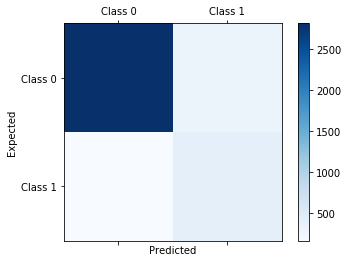

In [7]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

- Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
predTree = rfc.predict(X_test)

In [10]:
print(classification_report(y_test,predTree))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3139
           1       0.73      0.57      0.64       560

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.90      0.90      0.90      3699



Confusion matrix:
 [[3019  120]
 [ 242  318]]


Text(0, 0.5, 'Expected')

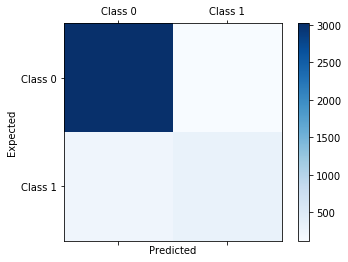

In [11]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=predTree)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

比較兩種 model 發現 logistic regression 在預測 class 1 的表現比較好，而 randomforest 在預測 class 0 的表現比較好

# 改進
- 用 Resample 來處理類別數量不平均的問題
- ~~新增 feature column~~ (後來仔細看 dataset 真的想不太到可以新增什麼，因為如果要新增一些前幾個月的結果當作 feature 最後勢必要把前幾個月的 row drop 掉，不然會有 NULL value，但這個 dataset 的資料量有點少所以覺得這不是個好方法)
- model ensemble 

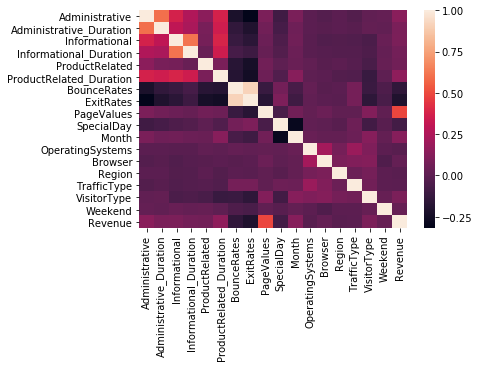

In [24]:
sns.heatmap(df_.corr())

In [19]:
df_.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,1,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,1,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,1,3,3,1,4,1,1,0


Class 0: 10422
Class 1: 1908


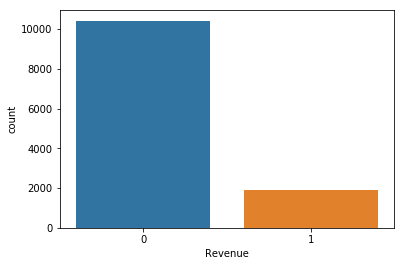

In [13]:
target_count = df_['Revenue'].value_counts()
sns.countplot(x="Revenue", data=df_)
print("Class 0:",target_count[0])
print("Class 1:",target_count[1])

In [14]:
count_class_0, count_class_1 = df_['Revenue'].value_counts()
df_class_0 = df_[df_['Revenue'] == 0]
df_class_1 = df_[df_['Revenue'] == 1]

## Random under-sampling
- 讓 class 資料比較多的資料變少
- 看預測經過 under-sampling 所 train 出來的 model 對於原本的 testing data 表現如何

Class 0: 1348
Class 1: 1348


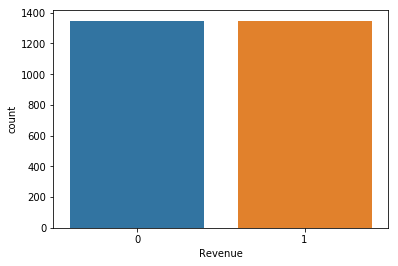

In [111]:
train = pd.merge(X_train, y_train, left_index=True, right_index=True)
class_0, class_1 = train['Revenue'].value_counts()
train_class_0 = train[train['Revenue'] == 0]
train_class_1 = train[train['Revenue'] == 1]
train_class_0_under = train_class_0.sample(class_1, replace=True)
train_test_under = pd.concat([train_class_1, train_class_0_under], axis=0)
sns.countplot(x='Revenue', data=train_test_under)
print('Class 0:', len(train_test_under[train_test_under['Revenue'] == 0]))
print('Class 1:', len(train_test_under[train_test_under['Revenue'] == 1]))

In [112]:
X_train_new = train_test_under.drop(['Revenue'],axis=1)
y_train_new = train_test_under['Revenue']

In [113]:
log = LogisticRegression()
log.fit(X_train_new,y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## under-sampling 小結
- 沒進步
- model 相比原本的更傾向於 predict 1，會這樣可能是因為丟掉太多 class 0 的資料造成 information loss

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3139
           1       0.55      0.72      0.62       560

   micro avg       0.87      0.87      0.87      3699
   macro avg       0.75      0.81      0.77      3699
weighted avg       0.89      0.87      0.87      3699

Confusion matrix:
 [[2809  330]
 [ 158  402]]


Text(0, 0.5, 'Expected')

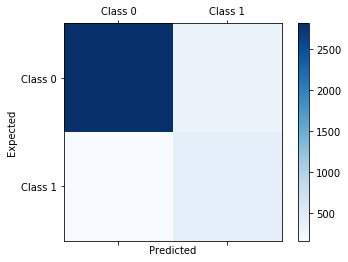

In [115]:
pred_ = log.predict(X_test)
print(classification_report(y_test,pred_))
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

              precision    recall  f1-score   support

           0       0.97      0.87      0.91      3139
           1       0.52      0.83      0.64       560

   micro avg       0.86      0.86      0.86      3699
   macro avg       0.75      0.85      0.78      3699
weighted avg       0.90      0.86      0.87      3699

Confusion matrix:
 [[2717  422]
 [  95  465]]


Text(0, 0.5, 'Expected')

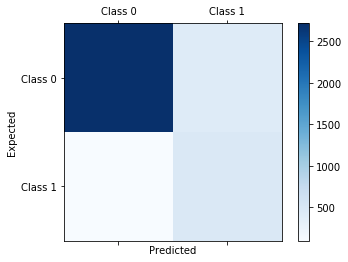

In [116]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train_new, y_train_new)
predTree_under = rf.predict(X_test)
print(classification_report(y_test,predTree_under))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predTree_under)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## Random over-sampling
- 複製很多筆 class 1 的資料
- 一開始傻傻的先複製然後才分 test & train 雖然做出來的結果意義不大但還是有整理出一些結論

Class 0: 10422
Class 1: 10422


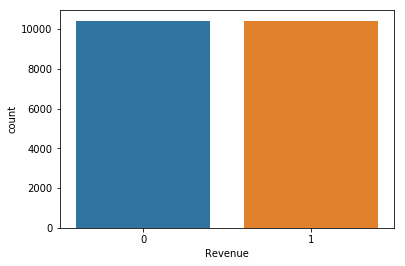

In [24]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
sns.countplot(x='Revenue', data=df_test_over)
print('Class 0:', len(df_test_over[df_test_over['Revenue'] == 0]))
print('Class 1:', len(df_test_over[df_test_over['Revenue'] == 1]))

In [26]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_test_over.drop(['Revenue'],axis=1), 
                                                    df_test_over['Revenue'], test_size=0.30)

In [29]:
log_over = LogisticRegression()
log_over.fit(X_train3,y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3139
           1       0.56      0.71      0.62       560

   micro avg       0.87      0.87      0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.89      0.87      0.88      3699

Confusion matrix:
 [[2826  313]
 [ 164  396]]


Text(0, 0.5, 'Expected')

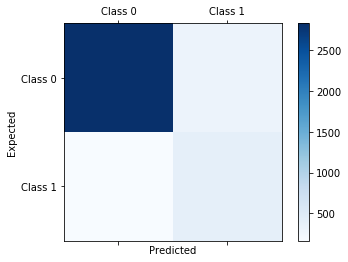

In [34]:
pred_over = log_over.predict(X_test)
print(classification_report(y_test,pred_over))
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_over)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

**沒有限制樹的深度**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3139
           1       0.89      0.99      0.94       560

   micro avg       0.98      0.98      0.98      3699
   macro avg       0.94      0.99      0.96      3699
weighted avg       0.98      0.98      0.98      3699

Confusion matrix:
 [[3068   71]
 [   4  556]]


Text(0, 0.5, 'Expected')

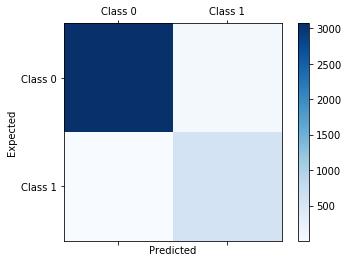

In [33]:
rf_over = RandomForestClassifier(n_estimators=1000)
rf_over.fit(X_train3, y_train3)
predTree_over = rf_over.predict(X_test)
print(classification_report(y_test,predTree_over))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predTree_over)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

**限制樹的深度以避免 overfitting**

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      3139
           1       0.60      0.88      0.71       560

   micro avg       0.89      0.89      0.89      3699
   macro avg       0.79      0.89      0.82      3699
weighted avg       0.92      0.89      0.90      3699

Confusion matrix:
 [[2807  332]
 [  65  495]]


Text(0, 0.5, 'Expected')

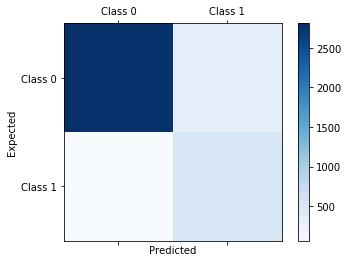

In [35]:
rf_over = RandomForestClassifier(n_estimators=1000, max_depth=8)
rf_over.fit(X_train3, y_train3)
predTree_over = rf_over.predict(X_test)
print(classification_report(y_test,predTree_over))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predTree_over)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## over-sampling 小結
- 我目前的做法是**先複製資料然後再分割**成 training 和 testing ，而這樣做的結果照理來說要比較好，因為會有很多 testing data 在 train 的時候是有看過的   


- logistic regression 在這方面卻沒有進步我覺得是因為一開始他也是用線性的方式對資料做線性 regression 因此重複的資料並不會對這方面造成顯著的影響   


- random forest 在這方面的表現就超級好，我覺得也不意外，畢竟決策樹如果看過很多相同的資料，很有可能 overfitting，所以我認為如果我是先做資料切割然後再複製應該結果就會跟 baseline 做出來的差不多，或是更差，為了驗證我創了另外的 model 限制樹的深度，的確結果就不怎麼樣

## over-sampling part II
- 先切割 test & train 再複製 data

Class 0: 7283
Class 1: 7283


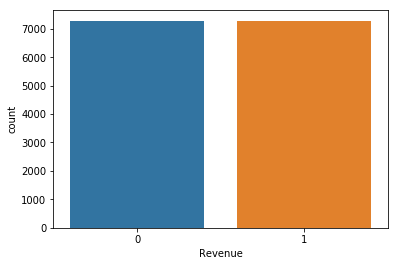

In [43]:
train = pd.merge(X_train, y_train, left_index=True, right_index=True)
class_0, class_1 = train['Revenue'].value_counts()
train_class_0 = train[train['Revenue'] == 0]
train_class_1 = train[train['Revenue'] == 1]
train_class_1_over = train_class_1.sample(class_0, replace=True)
train_test_over = pd.concat([train_class_0, train_class_1_over], axis=0)
sns.countplot(x='Revenue', data=train_test_over)
print('Class 0:', len(train_test_over[train_test_over['Revenue'] == 0]))
print('Class 1:', len(train_test_over[train_test_over['Revenue'] == 1]))

In [44]:
X_train_new = train_test_over.drop(['Revenue'],axis=1)
y_train_new = train_test_over['Revenue']

- logistic regression

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3139
           1       0.57      0.72      0.63       560

   micro avg       0.87      0.87      0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699

Confusion matrix:
 [[2831  308]
 [ 157  403]]


Text(0, 0.5, 'Expected')

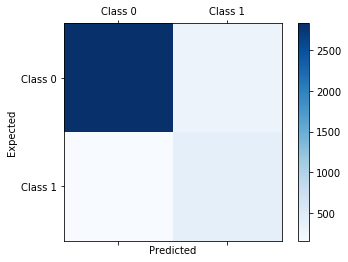

In [46]:
log_new = LogisticRegression()
log_new.fit(X_train_new,y_train_new)
pred_new = log_new.predict(X_test)
print(classification_report(y_test,pred_new))
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_new)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

- random forest

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3139
           1       0.66      0.64      0.65       560

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.80      0.79      0.79      3699
weighted avg       0.89      0.90      0.89      3699

Confusion matrix:
 [[2956  183]
 [ 203  357]]


Text(0, 0.5, 'Expected')

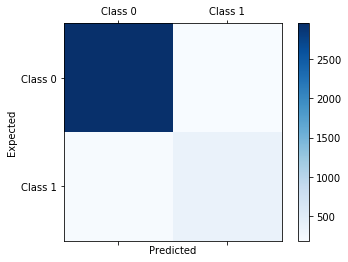

In [45]:
rf_over = RandomForestClassifier(n_estimators=1000)
rf_over.fit(X_train_new, y_train_new)
predTree_new = rf_over.predict(X_test)
print(classification_report(y_test,predTree_new))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predTree_new)
print('Confusion matrix:\n', conf_mat)
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## over-sampling 總結
- 結果還是不怎麼樣，可見資料的豐富程度還是很重要的

## model ensemble

- 現在回頭看看發現在 random forest 方面還是一開始做的 baseline model 表現得最好，於是我決定把它當作參考依據之一   


- logistic regression 方面都差不多所以我決定繼續用 baseline model 來當依據


- 還需要另一個 model ，我決定使用 xgboost classifier


In [48]:
from xgboost import XGBClassifier

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3139
           1       0.71      0.58      0.64       560

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.82      0.77      0.79      3699
weighted avg       0.89      0.90      0.90      3699

Confusion matrix:
 [[3005  134]
 [ 235  325]]


Text(0, 0.5, 'Expected')

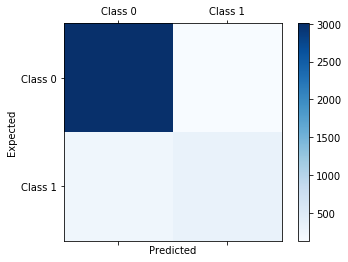

In [49]:
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
print(classification_report(y_test,preds))
conf_mat = confusion_matrix(y_true=y_test, y_pred=preds)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

In [84]:
result = []
for i in range(len(predictions)):
    vote = predictions[i] + predTree[i] + preds[i]
    if vote == 0:
        vote = 0
    elif vote == 1:
        vote = 0
    elif vote == 2:
        vote = 1
    elif vote == 3:
        vote = 1
    result.append(vote)

## 看一下 3 個 model ensemble 的結果如何
- 結果還是沒有突破 QQ 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3139
           1       0.70      0.61      0.65       560

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.82      0.78      0.80      3699
weighted avg       0.90      0.90      0.90      3699

Confusion matrix:
 [[2993  146]
 [ 218  342]]


Text(0, 0.5, 'Expected')

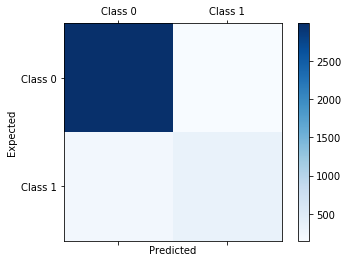

In [85]:
print(classification_report(y_test,result))
conf_mat = confusion_matrix(y_true=y_test, y_pred=result)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## 如果 3 個不行那你有試過 4 個嗎
- 一氣之下直接在弄一個 SVM 出來

In [58]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
pred_svm = model.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3139
           1       0.00      0.00      0.00       560

   micro avg       0.85      0.85      0.85      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.72      0.85      0.78      3699

Confusion matrix:
 [[3139    0]
 [ 560    0]]


Text(0, 0.5, 'Expected')

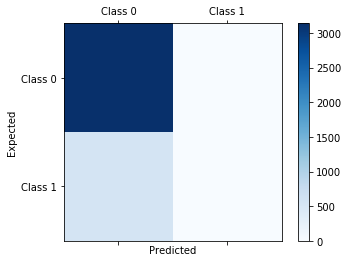

In [60]:
print(classification_report(y_test,pred_svm))
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred_svm)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

In [69]:
param_grid = {'C': [0.3,1, 3, 9, 27], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [62]:
from sklearn.model_selection import GridSearchCV

In [70]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [71]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.3, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.3, gamma=1, kernel=rbf, score=0.8436414176511466, total=   1.1s
[CV] C=0.3, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  C=0.3, gamma=1, kernel=rbf, score=0.8439346541536322, total=   1.1s
[CV] C=0.3, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  C=0.3, gamma=1, kernel=rbf, score=0.8438803894297635, total=   1.2s
[CV] C=0.3, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.3, gamma=0.1, kernel=rbf, score=0.8436414176511466, total=   1.3s
[CV] C=0.3, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.3, gamma=0.1, kernel=rbf, score=0.8439346541536322, total=   1.2s
[CV] C=0.3, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.3, gamma=0.1, kernel=rbf, score=0.8438803894297635, total=   1.2s
[CV] C=0.3, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.3, gamma=0.01, kernel=rbf, score=0.8436414176511466, total=   1.3s
[CV] C=0.3, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.3, gamma=0.01, kernel=rbf, score=0.8439346541536322, total=   1.3s
[CV] C=0.3, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.3, gamma=0.01, kernel=rbf, score=0.8438803894297635, total=   1.3s
[CV] C=0.3, gamma=0.001, kernel=rbf .....

[CV]  C=9, gamma=0.0001, kernel=rbf, score=0.8612656467315716, total=   1.1s
[CV] C=27, gamma=1, kernel=rbf .......................................
[CV]  C=27, gamma=1, kernel=rbf, score=0.8436414176511466, total=   1.5s
[CV] C=27, gamma=1, kernel=rbf .......................................
[CV]  C=27, gamma=1, kernel=rbf, score=0.8439346541536322, total=   1.4s
[CV] C=27, gamma=1, kernel=rbf .......................................
[CV]  C=27, gamma=1, kernel=rbf, score=0.8438803894297635, total=   1.5s
[CV] C=27, gamma=0.1, kernel=rbf .....................................
[CV]  C=27, gamma=0.1, kernel=rbf, score=0.842946490618485, total=   1.4s
[CV] C=27, gamma=0.1, kernel=rbf .....................................
[CV]  C=27, gamma=0.1, kernel=rbf, score=0.843239485575252, total=   1.4s
[CV] C=27, gamma=0.1, kernel=rbf .....................................
[CV]  C=27, gamma=0.1, kernel=rbf, score=0.8435326842837274, total=   1.5s
[CV] C=27, gamma=0.01, kernel=rbf .....................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.3, 1, 3, 9, 27], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [72]:
grid.best_params_

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}

In [73]:
grid_predictions = grid.predict(X_test)

In [74]:
print(confusion_matrix(y_test,grid_predictions))

[[3088   51]
 [ 391  169]]


              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3139
           1       0.77      0.30      0.43       560

   micro avg       0.88      0.88      0.88      3699
   macro avg       0.83      0.64      0.68      3699
weighted avg       0.87      0.88      0.86      3699

Confusion matrix:
 [[3088   51]
 [ 391  169]]


Text(0, 0.5, 'Expected')

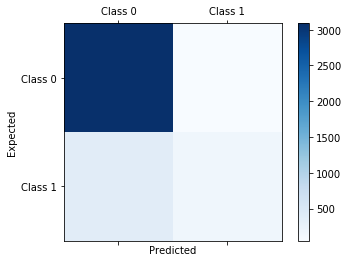

In [68]:
print(classification_report(y_test,grid_predictions))
conf_mat = confusion_matrix(y_true=y_test, y_pred=grid_predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## 各種 model 整理

In [79]:
print('Logistic regression:\n',confusion_matrix(y_true=y_test, y_pred=predictions))
print(classification_report(y_test,predictions))
print('Random Forest:\n',confusion_matrix(y_true=y_test, y_pred=predTree))
print(classification_report(y_test,predTree))
print('Xgboost classifier:\n',confusion_matrix(y_true=y_test, y_pred=preds))
print(classification_report(y_test,preds))
print('SVM:\n',confusion_matrix(y_true=y_test, y_pred=grid_predictions))
print(classification_report(y_test,grid_predictions))

Logistic regression:
 [[2819  320]
 [ 156  404]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3139
           1       0.56      0.72      0.63       560

   micro avg       0.87      0.87      0.87      3699
   macro avg       0.75      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699

Random Forest:
 [[3019  120]
 [ 242  318]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3139
           1       0.73      0.57      0.64       560

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.90      0.90      0.90      3699

Xgboost classifier:
 [[3005  134]
 [ 235  325]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3139
           1       0.71      0.58      0.64       560

   micro avg       0.90      0.90      0.9

In [104]:
answer = []
for i in range(len(predictions)):
    dis = predictions[i] + predTree[i] + preds[i] + grid_predictions[i]
    if dis == 0:
        dis = 0
    elif dis == 1:
        dis = 0
    elif dis == 2:
        if grid_predictions[i] == 0:
            dis = 1
        else:
            dis = 0
    elif dis == 3:
        dis = 1
    elif dis == 4:
        dis = 1
        
    answer.append(dis)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3139
           1       0.70      0.61      0.65       560

   micro avg       0.90      0.90      0.90      3699
   macro avg       0.82      0.78      0.80      3699
weighted avg       0.90      0.90      0.90      3699

Confusion matrix:
 [[2993  146]
 [ 218  342]]


Text(0, 0.5, 'Expected')

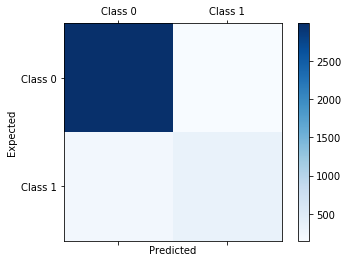

In [97]:
print(classification_report(y_test,answer))
conf_mat = confusion_matrix(y_true=y_test, y_pred=answer)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')

## 總結：
- 有三個 model 的表現差不多，分別是：
    - 1. baseline 的 random forest 
    - 2. 三個 model 組成的 model 
    - 3. 四個 model 組成的 model
    
    
- under-sampling and over-sampling:
    - under-sampling 其實還沒開始做我就覺得效果不會比較好，畢竟資料變少了
    - over-sampling 我覺得在影像識別方面可能還可以透過修圖、轉向的方式來新增差異性比較大的同類 data，但這種類型的 data 除了複製以外很難新增同類資料
    
- ensemble:
    - 我覺得之後應該要讓每個 model 用的 training data 不一樣，最快的方式就是丟不同的 column 進去 train